<a href="https://colab.research.google.com/github/aarteesimran/Human-activity-time-series-using-HVG-and-NVG-/blob/main/FDA_Group_3_Project_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1**
Please refer to the readme file inside our submission folder.
#Changing active working directory to Project_3_dataset. This folder is where we upload our datasets.
# Project_3_dataset will be created inside the content folder. We are assuming that your current working directory is /content only


In [ ]:
# Installing the Required Package
!pip install ts2vg
!pip install igraph
!pip install pyforest==0.1.1
!pip install cairocffi


     |████████████████████████████████| 1.0 MB 8.7 MB/s 
     |████████████████████████████████| 3.1 MB 6.0 MB/s 
     |████████████████████████████████| 3.4 MB 7.1 MB/s 
  Created wheel for pyforest: filename=pyforest-0.1.1-py2.py3-none-any.whl size=9212 sha256=791a889216546393b3ce3efa6f5df0d611c38d1514196911bb8b6a2f085813d7
  Stored in directory: /root/.cache/pip/wheels/3d/99/37/de9cbb8b5558ed2ddab28b25fa957485ca85fda7e7d2e78434
Successfully built pyforest
     |████████████████████████████████| 88 kB 4.9 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=d6e0cd98f46a578eac5cdb4882f320249099b50f1d7fca09d1f8d774834ecee2
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [ ]:
#changing active working directory to Project_3_dataset. This folder is where we upload our datasets.
# Project_3_dataset will be created inside the content folder. We are assuming that your current working directory is /content only
%pwd
%cd /content/Project_3_dataset_1
#or
#% cd Project_3_dataset

/content/Project_3_dataset_1


In [ ]:
%pwd

'/content/Project_3_dataset_1'

In [ ]:
#Importing and Uploading the files
from google.colab import files
uploaded = files.upload()

Saving acc_climbingdown_chest_s1.csv to acc_climbingdown_chest_s1.csv
Saving acc_climbingdown_chest_s2.csv to acc_climbingdown_chest_s2.csv
Saving acc_climbingdown_chest_s3.csv to acc_climbingdown_chest_s3.csv
Saving acc_climbingdown_chest_s4.csv to acc_climbingdown_chest_s4.csv
Saving acc_climbingdown_chest_s5.csv to acc_climbingdown_chest_s5.csv
Saving acc_climbingdown_chest_s6.csv to acc_climbingdown_chest_s6.csv
Saving acc_climbingdown_chest_s7.csv to acc_climbingdown_chest_s7.csv
Saving acc_climbingdown_chest_s8.csv to acc_climbingdown_chest_s8.csv
Saving acc_climbingdown_chest_s9.csv to acc_climbingdown_chest_s9.csv
Saving acc_climbingdown_chest_s10.csv to acc_climbingdown_chest_s10.csv
Saving acc_climbingdown_chest_s11.csv to acc_climbingdown_chest_s11.csv
Saving acc_climbingdown_chest_s12.csv to acc_climbingdown_chest_s12.csv
Saving acc_climbingdown_chest_s13.csv to acc_climbingdown_chest_s13.csv
Saving acc_climbingdown_chest_s14.csv to acc_climbingdown_chest_s14.csv
Saving acc

In [ ]:
# We are Creating the folder and uploading all(60) datasets and creating it has directory and calling it 
# Before running the code kindly create the folder and name it as "Project_3_Data Set" and then upload all the 60 datasets.

import os
path = '/content/Project_3_dataset_1'
files = os.listdir(path)

#Then creating a empty list and storing the files from the directory
list_new = []
for f in files:
	list_new.append(f)
print(list_new)


   

['acc_climbingup_chest_s15.csv', 'acc_climbingdown_chest_s13.csv', 'acc_walking_chest_s1.csv', 'acc_climbingdown_chest_s11.csv', 'acc_running_chest_s12.csv', 'acc_running_chest_s10.csv', 'acc_walking_chest_s7.csv', 'acc_climbingup_chest_s7.csv', 'acc_climbingdown_chest_s1.csv', 'acc_running_chest_s8.csv', 'acc_running_chest_s3.csv', 'acc_walking_chest_s9.csv', 'acc_running_chest_s15.csv', 'acc_walking_chest_s3.csv', 'acc_climbingup_chest_s5.csv', 'acc_running_chest_s5.csv', 'acc_climbingdown_chest_s7.csv', 'acc_walking_chest_s2.csv', 'acc_walking_chest_s13.csv', 'acc_running_chest_s9.csv', 'acc_climbingup_chest_s14.csv', 'acc_climbingup_chest_s4.csv', 'acc_climbingup_chest_s13.csv', 'acc_walking_chest_s8.csv', 'acc_walking_chest_s4.csv', 'acc_climbingup_chest_s10.csv', 'acc_climbingdown_chest_s5.csv', 'acc_climbingup_chest_s8.csv', 'acc_climbingup_chest_s2.csv', 'acc_climbingup_chest_s1.csv', 'acc_climbingup_chest_s12.csv', 'acc_walking_chest_s11.csv', 'acc_climbingdown_chest_s2.csv', 

In [ ]:
#Importing required packages
import pandas as pd
import numpy as np
from ts2vg import HorizontalVG
from ts2vg import NaturalVG

#Creating a empty table
final_table = []

#Create a function
def create_attributes(df,axis, method):
  g = HorizontalVG()
  if method == "NVG":
    g = NaturalVG()
  
  column = "attr" + "_" + axis
  g.build(df[column][1000:2024])
  ig_g = g.as_igraph()
  degree = np.mean(ig_g.degree())
  diameter = ig_g.diameter()
  average_path_length = ig_g.average_path_length()

  return degree, diameter, average_path_length


  
#Creating a for_loop
for file in list_new:
  file_name_split = file.split(".")
  basename = file_name_split[0]
  extension = file_name_split[1]
  basename_split = basename.split("_")
  activity = basename_split[1]
  subject = basename_split[3][1:]
  methods = ["HVG", "NVG"]
  axes = ["x", "y", "z"]

#Reading the dataset
  data1 = pd.read_csv(file)

# Using Nested For loop using method and axis to calculate and tabulate the required varibles
# In the Nested For loop we are calling the function which we have created previously
  for method in methods:
    for axis in axes:
      degree, diameter, average_path_length = create_attributes(data1, axis, method)
      final_table.append((method, subject, axis, degree, diameter, average_path_length, activity))

#Creatig a datafram loading the list values in data frame
final_df = pd.DataFrame(final_table, columns=['Method','Subject','Accelerometer axis', 'degree', 'diameter', 'average_path_length', 'activity'])
  
print(final_df)


    Method Subject  ... average_path_length    activity
0      HVG      15  ...           11.659058  climbingup
1      HVG      15  ...           13.796356  climbingup
2      HVG      15  ...           11.595193  climbingup
3      NVG      15  ...            4.504794  climbingup
4      NVG      15  ...            5.264697  climbingup
..     ...     ...  ...                 ...         ...
355    HVG      11  ...           12.293563  climbingup
356    HVG      11  ...           14.613415  climbingup
357    NVG      11  ...            4.175926  climbingup
358    NVG      11  ...            4.171310  climbingup
359    NVG      11  ...            4.487728  climbingup

[360 rows x 7 columns]


In [ ]:
#Viewing the Final datastet
final_df

,Method,Subject,Accelerometer axis,degree,diameter,average_path_length,activity
0,HVG,15,x,3.953125,26,11.659058,climbingup
1,HVG,15,y,3.947266,32,13.796356,climbingup
2,HVG,15,z,3.968750,26,11.595193,climbingup
3,NVG,15,x,12.820312,10,4.504794,climbingup
4,NVG,15,y,13.744141,11,5.264697,climbingup
...,...,...,...,...,...,...,...
355,HVG,11,y,3.960938,29,12.293563,climbingup
356,HVG,11,z,3.947266,32,14.613415,climbingup
357,NVG,11,x,12.972656,8,4.175926,climbingup
358,NVG,11,y,15.654297,9,4.171310,climbingup


In [ ]:
#Filtering the dataset based on our requirement
Seperating_df_activity_run_walk = ['running', 'walking']
result_df_Walk_run = final_df[final_df['activity'].isin(Seperating_df_activity_run_walk)]
result_df_Walk_run

,Method,Subject,Accelerometer axis,degree,diameter,average_path_length,activity
12,HVG,1,x,3.943359,26,10.552521,walking
13,HVG,1,y,3.945312,33,12.669166,walking
14,HVG,1,z,3.947266,25,8.433804,walking
15,NVG,1,x,10.843750,12,4.565854,walking
16,NVG,1,y,14.855469,11,4.641223,walking
...,...,...,...,...,...,...,...
337,HVG,5,y,3.947266,25,10.643187,walking
338,HVG,5,z,3.966797,23,9.234526,walking
339,NVG,5,x,9.587891,9,4.722381,walking
340,NVG,5,y,11.394531,10,4.682857,walking


Text(0.5, 0.98, 'Comparision of diameter and degree for Walking Vs Running for axis X,Y,X')

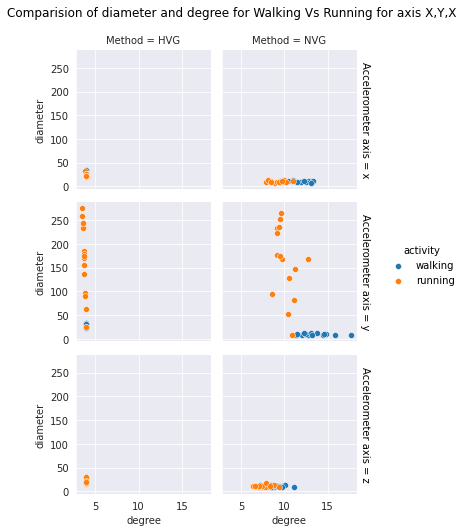

In [ ]:
#Imprting Required Package for plotting
import seaborn as sns

#Plotting degree vs diameter for walking and running
scatter_df_walk_run= result_df_Walk_run 
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(scatter_df_walk_run, col=("Method"), row="Accelerometer axis",hue='activity', 
                      margin_titles=True, height=2.5)
g.map(sns.scatterplot, "degree", "diameter")
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure
g.fig.suptitle('Comparision of diameter and degree for Walking Vs Running for axis X,Y,X')

In [ ]:
Seperating_df_activity_climb = ['climbingup', 'climbingdown']
result_df_climb = final_df[final_df['activity'].isin(Seperating_df_activity_climb)]
result_df_climb

,Method,Subject,Accelerometer axis,degree,diameter,average_path_length,activity
0,HVG,15,x,3.953125,26,11.659058,climbingup
1,HVG,15,y,3.947266,32,13.796356,climbingup
2,HVG,15,z,3.968750,26,11.595193,climbingup
3,NVG,15,x,12.820312,10,4.504794,climbingup
4,NVG,15,y,13.744141,11,5.264697,climbingup
...,...,...,...,...,...,...,...
355,HVG,11,y,3.960938,29,12.293563,climbingup
356,HVG,11,z,3.947266,32,14.613415,climbingup
357,NVG,11,x,12.972656,8,4.175926,climbingup
358,NVG,11,y,15.654297,9,4.171310,climbingup


Text(0.5, 0.98, 'Comparision of diameter and degree for ClimbingUp Vs ClimbingDown for axis X,Y,X')

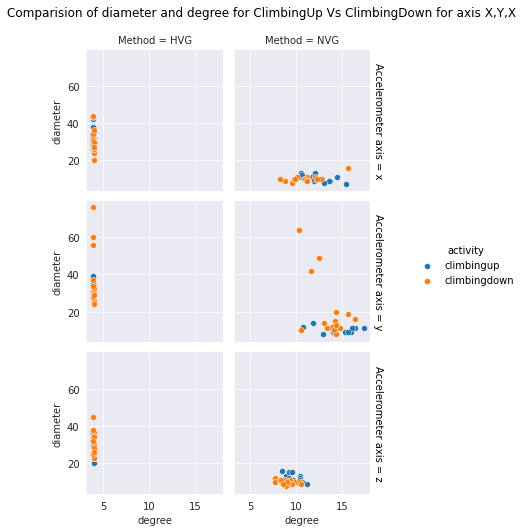

In [ ]:
#Plotting degree vs diameter for climbing_up and climbing_down
scatter_df_climb= result_df_climb
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(scatter_df_climb, col=("Method"), row="Accelerometer axis",hue='activity', 
                      margin_titles=True, height=2.5)
g.map(sns.scatterplot, "degree", "diameter")
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure
g.fig.suptitle('Comparision of diameter and degree for ClimbingUp Vs ClimbingDown for axis X,Y,X')

Conclusion: Here the the analysis for Task 1 ends. We combined the data files and a total of 60 data files for 4 different activities of 15 subjects (people) were uploaded to perform analysis. We had already combined those files which were in multiple parts. We also renamed the files for easier idenfication and name splitting which did inside a for loop using the list that we populated with the names of the csv files in it. A function named create_attribute has been created to calculate HVG and NVG (average degree, network diameter, and average path length). We used seaborn sns facetgrid to plot the scatterplots for walking vs running and climbing up vs climbing down. 

Walking VS Running:
The trend for walking vs running varies for each graph and axis. For HVG all three axes the degree is saturated at less than 5 on the x-axis while it ranges between 5 to 15 for NVG.

Climbing Up VS Climbing Down
The trend for climbingup vs climbing down varies for each graph and axis. For HVG all three axes the degree is saturated at less than 5 while diamter ranges greater than 60 as well. For NVG degree is greater than 5, ranging between 5 to 15 and greater while diameter although saturated on the lower scale, goes upto greater than 60 in some cases.


In [ ]:
#------------------------------------------------------Task - 2#---------------------------------------------------


## **Task 2**

In [ ]:
# Using s_entropy function
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

#Using ordinal patterns function
def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    
#Using p_entropy function 
def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

#Using Complexity Function
def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [ ]:
#Creating the List and storing the value we want
Emb_DIM =  [3,4,5,6]
Emb_Delay = [1,2,3]
Signal_Length = [1024,2048,4096]
axes = ['x', 'y', 'z']


In [ ]:
#Creating a empty table
final_table_2 = []

#Creating a function
def create_attributes_2(df, axis, signal_length, dimension, delay):
  # attr_axis
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  entropy = p_entropy(op)
  complexity_result = complexity(op)
  return entropy, complexity_result

#Using for loop
for file in list_new:
  file_name_split = file.split(".")
  basename = file_name_split[0]
  extension = file_name_split[1]
  basename_split = basename.split("_")
  activity = basename_split[1]
  subject = basename_split[3][1:]
  Emb_DIM =  [3,4,5,6]
  Emb_Delay = [1,2,3]
  Signal_Length = [1024,2048,4096]
  axes = ['x', 'y', 'z']
  input_df = pd.read_csv(file)
 #Using Nested For loop  
  for axis in axes:
    for signal_length in Signal_Length:
      for dim in Emb_DIM:
        for delay in Emb_Delay:
          entropy, complexity_output = create_attributes_2(input_df, axis, signal_length, dim, delay)
          final_table_2.append((subject, axis, signal_length, dim, delay, entropy, complexity_output, activity))

#Storing it into the final dataframe
final_df_2 = pd.DataFrame(final_table_2, columns=['Subject','Accelerometer axis', 'signal_length', 'dimension', 'delay', 'entropy', 'complexity', 'activity'])

  
print(final_df_2)

     Subject Accelerometer axis  ...  complexity    activity
0         15                  x  ...    0.154024  climbingup
1         15                  x  ...    0.077578  climbingup
2         15                  x  ...    0.032887  climbingup
3         15                  x  ...    0.223163  climbingup
4         15                  x  ...    0.142105  climbingup
...      ...                ...  ...         ...         ...
6475      11                  z  ...    0.215408  climbingup
6476      11                  z  ...    0.162326  climbingup
6477      11                  z  ...    0.284251  climbingup
6478      11                  z  ...    0.238810  climbingup
6479      11                  z  ...    0.185725  climbingup

[6480 rows x 8 columns]


In [ ]:
#Viewinf the final output
final_df_2

,Subject,Accelerometer axis,signal_length,dimension,delay,entropy,complexity,activity
0,15,x,1024,3,1,0.804729,0.154024,climbingup
1,15,x,1024,3,2,0.911735,0.077578,climbingup
2,15,x,1024,3,3,0.964579,0.032887,climbingup
3,15,x,1024,4,1,0.732274,0.223163,climbingup
4,15,x,1024,4,2,0.869332,0.142105,climbingup
...,...,...,...,...,...,...,...,...
6475,11,z,4096,5,2,0.840876,0.215408,climbingup
6476,11,z,4096,5,3,0.897078,0.162326,climbingup
6477,11,z,4096,6,1,0.763758,0.284251,climbingup
6478,11,z,4096,6,2,0.854578,0.238810,climbingup


In [ ]:
#Filtering the dataset based on our requirement
Seperating_df_activity_run_walk = ['running', 'walking']
result_df_Walk_run = final_df_2[final_df_2['activity'].isin(Seperating_df_activity_run_walk)]
result_df_Walk_run

,Subject,Accelerometer axis,signal_length,dimension,delay,entropy,complexity,activity
216,1,x,1024,3,1,0.890271,0.094267,walking
217,1,x,1024,3,2,0.938176,0.055844,walking
218,1,x,1024,3,3,0.947135,0.049901,walking
219,1,x,1024,4,1,0.835634,0.162967,walking
220,1,x,1024,4,2,0.895550,0.116910,walking
...,...,...,...,...,...,...,...,...
6151,5,z,4096,5,2,0.953299,0.076763,walking
6152,5,z,4096,5,3,0.934142,0.103186,walking
6153,5,z,4096,6,1,0.890808,0.195627,walking
6154,5,z,4096,6,2,0.929339,0.139671,walking


Text(0.5, 0.98, 'Comparision of Complexity and entropy for Walking Vs Running for axis X,Y,X')

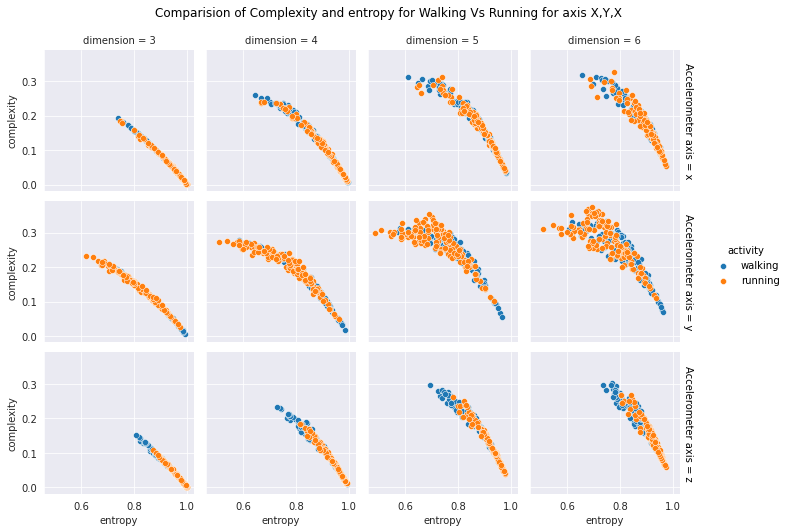

In [ ]:
#Plotting the Graph
scatter_df_run_walk=  result_df_Walk_run  
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(scatter_df_run_walk, col="dimension", row="Accelerometer axis",hue='activity', 
                      margin_titles=True, height=2.5)
g.map(sns.scatterplot, "entropy", "complexity")
g.add_legend()
# adjust the Figure
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Comparision of Complexity and entropy for Walking Vs Running for axis X,Y,X')

In [ ]:
#Filtering the dataset based on our requirement
Seperating_df_activity_climb = ['climbingup', 'climbingdown']
result_df_climb = final_df_2[final_df_2['activity'].isin(Seperating_df_activity_climb)]
result_df_climb

,Subject,Accelerometer axis,signal_length,dimension,delay,entropy,complexity,activity
0,15,x,1024,3,1,0.804729,0.154024,climbingup
1,15,x,1024,3,2,0.911735,0.077578,climbingup
2,15,x,1024,3,3,0.964579,0.032887,climbingup
3,15,x,1024,4,1,0.732274,0.223163,climbingup
4,15,x,1024,4,2,0.869332,0.142105,climbingup
...,...,...,...,...,...,...,...,...
6475,11,z,4096,5,2,0.840876,0.215408,climbingup
6476,11,z,4096,5,3,0.897078,0.162326,climbingup
6477,11,z,4096,6,1,0.763758,0.284251,climbingup
6478,11,z,4096,6,2,0.854578,0.238810,climbingup


Text(0.5, 0.98, 'Comparision of Complexity and Entropy for ClimbingUp Vs ClimbingDown for axis X,Y,X')

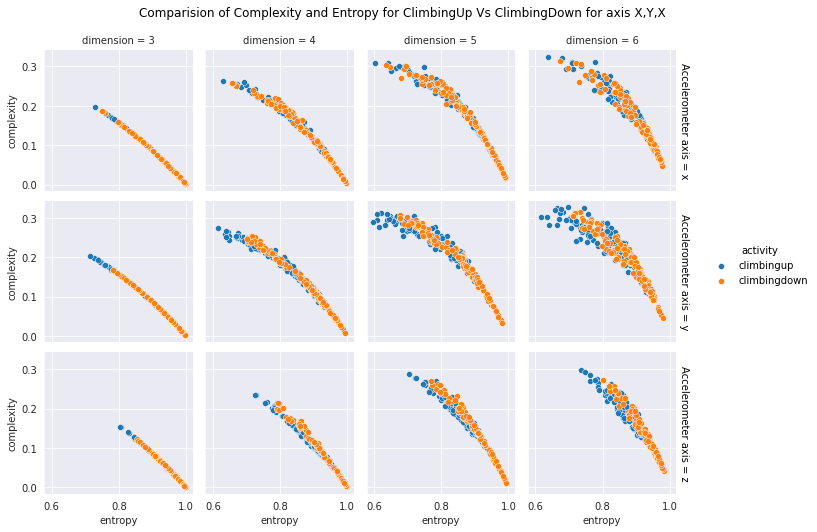

In [ ]:
#Plotting the Graph
scatter_df_climbup_climbdown= result_df_climb 
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(scatter_df_climbup_climbdown, col="dimension", row="Accelerometer axis",hue='activity', 
                      margin_titles=True, height=2.5)
g.map(sns.scatterplot, "entropy", "complexity")
g.add_legend()
# adjust the Figure
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Comparision of Complexity and Entropy for ClimbingUp Vs ClimbingDown for axis X,Y,X')

Task 2 - Conclusion
The first part of this task is the functions defined for permutation entropy provided to us. There are a total of five defined functions i.e. s_entropy, ordinal patterns, hash, p_entropy, complexity. We use the files we imported for task 1 and create a new function. We create 4 list objects next to store the values of dimensions, delay, signal length and axes. We create a function named create_attributes_2 that uses the values from the csv files data and returns ordinal patterns, entropy and complexity, simaltaneously tabulating data into the table. 

We have used seaborn sns facetgrid to plot complexity and entropy for running vs walking and for climbing up vs climbing down. 
For running vs walking the plot is more saturated for walking and shows a arc like pattern. While the entropy is mostly greater than 0.6 except for axis y and the complexity is spread over the scale. 
For climbing up and climbing down the graphs are similar while they are more scattered for dimension 5 and 6 they are more jumbled for 3 and 4. The values for entropy range between 0.6 and 1.0 and complexity goes greater than 0.3.

In [ ]:
!git init

Reinitialized existing Git repository in /content/Project_3_dataset_1/.git/


In [ ]:
!git config — global user.email “aarteedhomeja@gmail.com  ”
!git config — global user.name “aarteesimran”
!git add -A
!git commit -m “first commit”
!git clone https://github.com/aarteesimran/Human-activity-time-series-using-HVG-and-NVG-.git
!git push -u origin new


usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: old-name new-name
    --remove-section      remove a section: name
    -l, --list            list all
 

In [ ]:
!git remote rm origin